In [73]:
from PIL import Image
import numpy as np
from PIL import ImageOps, ImageChops
import matplotlib.pyplot as plt
from PIL import ImageStat as stat

In [74]:
def statystyki(im):
    print("tryb obrazu", im.mode)
    print("rozmiar obrazu", im.size)
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

# Tryby obrazów

tryb obrazu RGBA
rozmiar obrazu (300, 380)
extrema  [(1, 255), (0, 255), (0, 255), (0, 255)]
count  [114000, 114000, 114000, 114000]
mean  [150.60785964912282, 148.89475438596492, 136.6682894736842, 173.81698245614035]
median  [149, 148, 144, 255]
stddev  [59.91305745841543, 60.1255914559028, 61.70437766084913, 117.8906738392094]


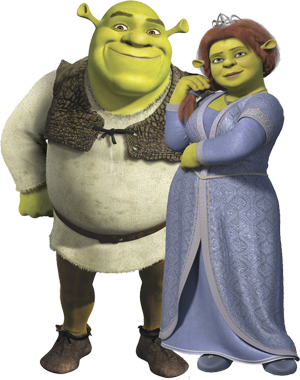

In [75]:
shrek = Image.open("Shrek_Fiona.png")
statystyki(shrek)
shrek

# Konwersja do obrazu w trybi P z paletą ADAPTIVE

In [76]:
p256_adapt = shrek.convert("P", palette=Image.ADAPTIVE, colors=256)
p64_adapt  = shrek.convert("P", palette=Image.ADAPTIVE, colors=64)

(np.float64(-0.5), np.float64(299.5), np.float64(379.5), np.float64(-0.5))

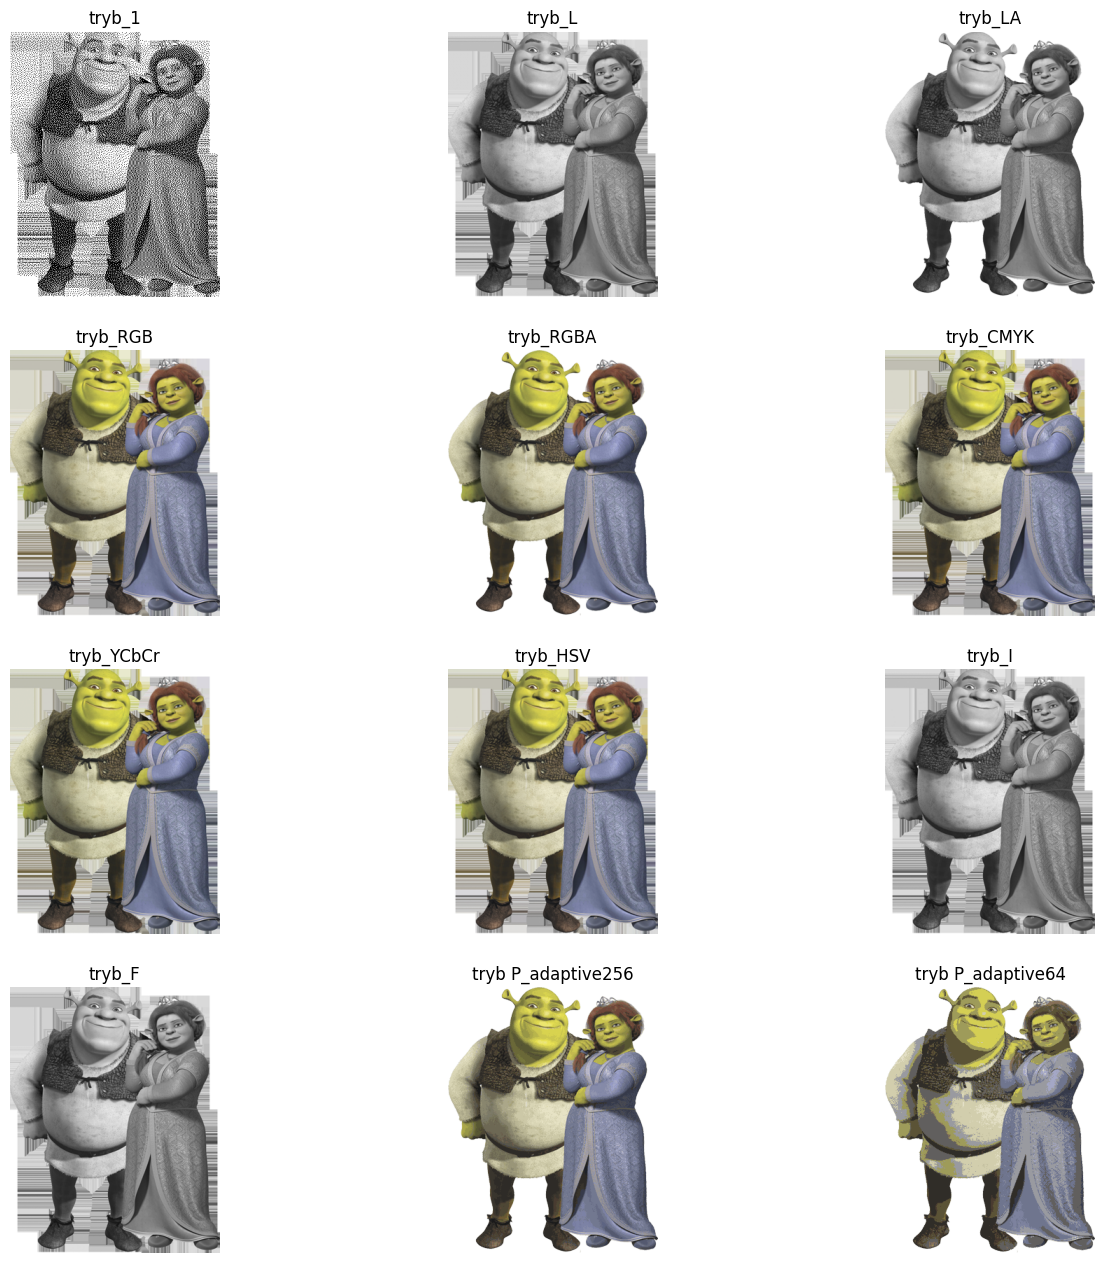

In [77]:
tryby = ['1', 'L', 'LA',  'RGB','RGBA','CMYK','YCbCr','HSV',"I",'F']
plt.figure(figsize=(16, 20))
i=1
for t in tryby:
    file_name = "tryb_"+ str(t)
    im_c = shrek.convert(t)
    plt.subplot(5, 3, i)
    plt.title(str(file_name))
    plt.imshow(im_c, "gray")
    plt.axis('off')
    i +=1
plt.subplot(5, 3, i)
plt.title('tryb P_adaptive256')
plt.imshow(p256_adapt, "gray")
plt.axis('off')
plt.subplot(5, 3, i++1)
plt.title('tryb P_adaptive64')
plt.imshow(p64_adapt, "gray")
plt.axis('off')


# tryb RGBA

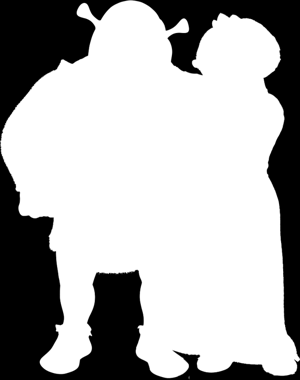

In [78]:
r,g,b,a = shrek.split()
a




[(0, 0), (0, 0), (0, 0)]


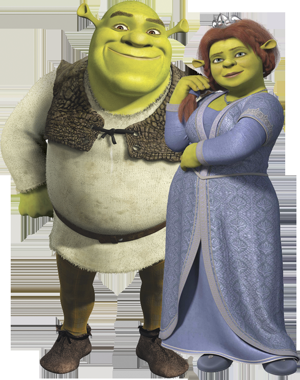

In [79]:
im1 = Image.merge('RGB', (r,g,b))
im2 = shrek.convert('RGB')                
diff = ImageChops.difference(im1, im2)
s = stat.Stat(diff)
print(s.extrema)
im1


# paste z maską - wykorzystanie do własnej konwersji na RGB

tryb obrazu:  RGB


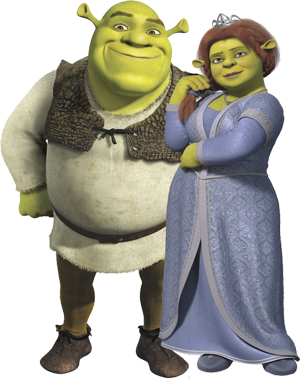

In [80]:
shrek_RGB = Image.new('RGB', shrek.size, (255,255,255)) # nowy obraz wypełniony na biało
shrek_RGB.paste(shrek, (0, 0), a) # wklejanie obrazu w maską 
print('tryb obrazu: ', shrek_RGB.mode)
shrek_RGB

# im.putalpha(im1)   - dodaje lub zastępuje kanal alfa, im1 jest obrazem w trybie 1 lub L

RGBA


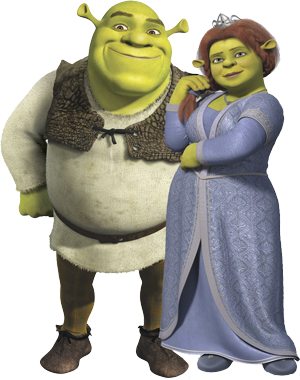

In [81]:
shrek_RGB1 = shrek_RGB.copy()
shrek_RGB1.putalpha(a)
print(shrek_RGB1.mode)
shrek_RGB1

tryb motyla RGBA
(1331, 1876)
(300, 380)


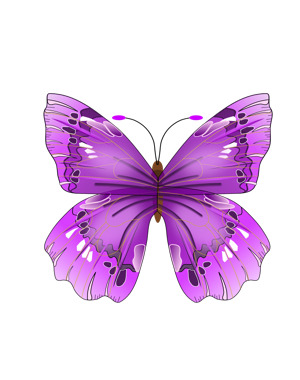

In [82]:
motyl = Image.open('motyl.png')
print("tryb motyla", motyl.mode)
print(motyl.size)
motyl1 = motyl.resize(shrek.size)
print(motyl1.size)
motyl1

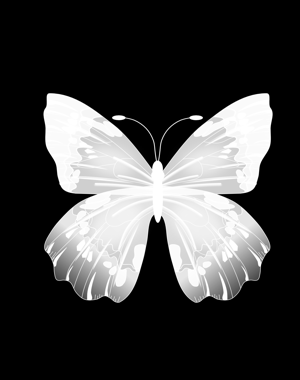

In [83]:
shrek_RGB2 = shrek_RGB.copy()
rm,gm,bm,am = motyl1.split()
am

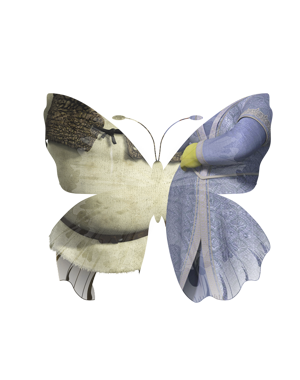

In [84]:
shrek_RGB2 = shrek_RGB.copy()
shrek_RGB2.putalpha(am) # kanał alfa obrazu motyl1 wstawiam jako kanał alfa do obrazu shrek_RGB

shrek_RGB2

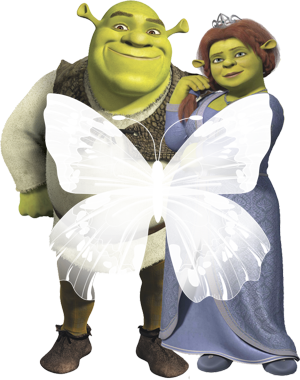

In [85]:
am_neg = ImageOps.invert(am)  # negatyw kanału am
shrek_RGB3 = shrek_RGB.copy()
shrek_RGB3.putalpha(am_neg) 
shrek_RGB3

(300, 380) (300, 380)


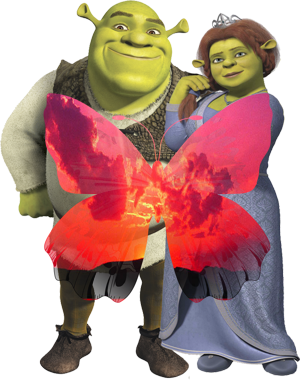

In [ ]:
tlo_0 = Image.open('tlo.png')
tlo = tlo_0.resize(shrek_RGB.size) # dostosowanie rozmiaróww
print(tlo.size, motyl1.size)
shrek_RGB4 = shrek_RGB.copy()
shrek_RGB4.paste(tlo, (0, 0), motyl1)
shrek_RGB4

# kompozycje z maską - Image.composite(im1, im2, maska)
# równoważne im2.paste(im1, (0,0), maska)

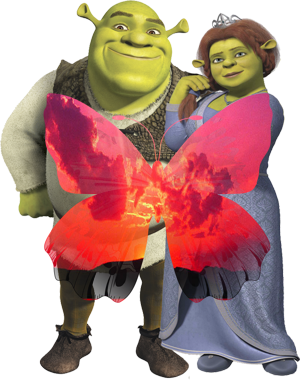

In [87]:
shrek_RGB5 = shrek_RGB.copy()
comp = Image.composite(tlo, shrek_RGB5, am) 
comp

# konwersja do trybu P c.d.

In [88]:
im = Image.open("olsztyn.jpg")

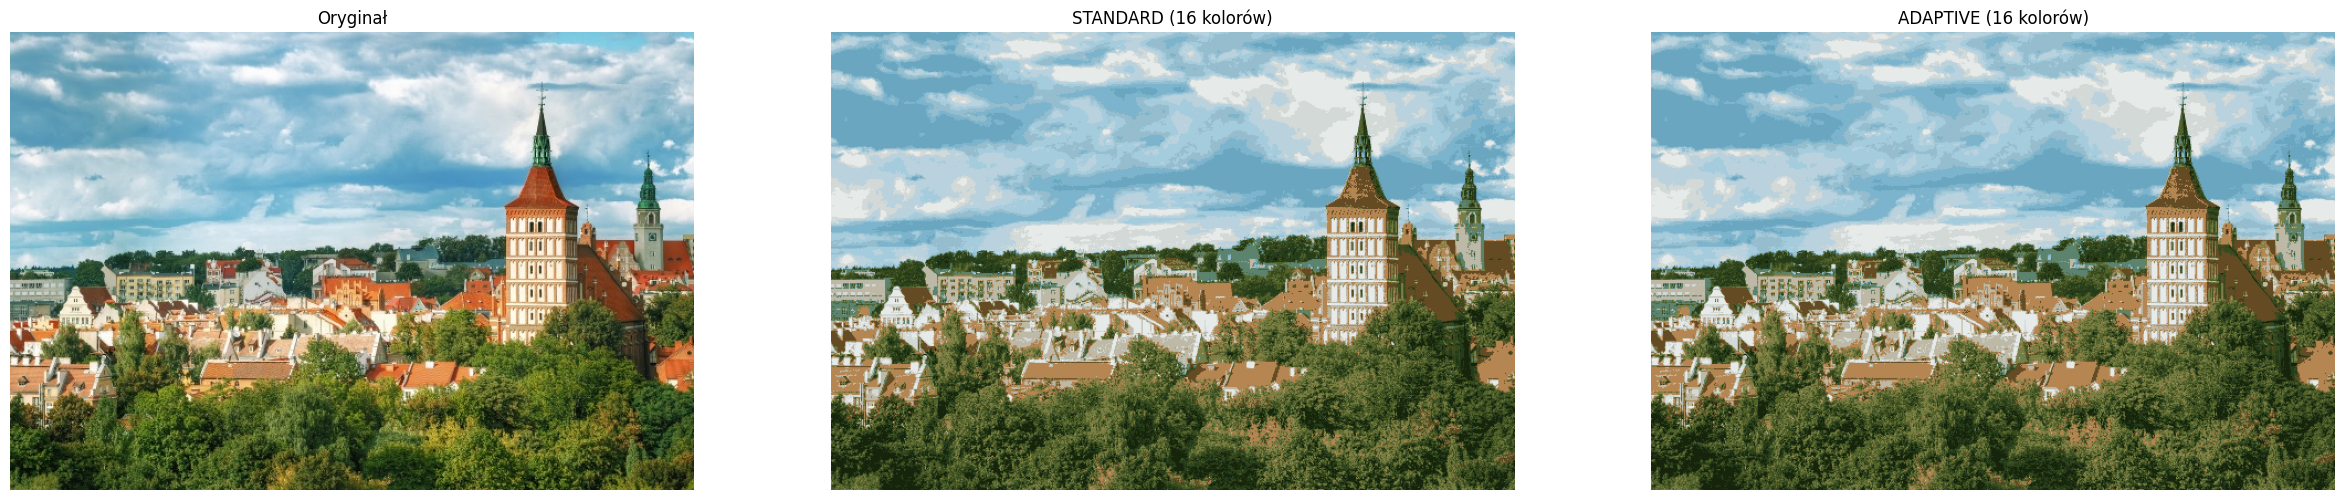

In [89]:

# Definicja 16 standardowych kolorów ---
standard_colors = [
    (0, 0, 0),       # Czarny
    (0, 0, 128),     # Niebieski
    (0, 128, 0),     # Zielony
    (0, 128, 128),   # Turkusowy
    (128, 0, 0),     # Czerwony
    (128, 0, 128),   # Magenta
    (128, 128, 0),   # Oliwkowy
    (192, 192, 192), # Jasnoszary
    (128, 128, 128), # Ciemnoszary
    (0, 0, 255),     # Jasnoniebieski
    (0, 255, 0),     # Jasnozielony
    (0, 255, 255),   # Jasny turkusowy
    (255, 0, 0),     # Jasnoczerwony
    (255, 0, 255),   # Jasna magenta
    (255, 255, 0),   # Żółty
    (255, 255, 255)  # Biały
]



# Konwersja do trybu P z paletą ADAPTIVE (16 kolorów) ---
adaptive_img = im.convert("P", palette = Image.ADAPTIVE, colors=16)

# Konwersja do trybu P z paletą STANDARDOWĄ (16 kolorów) ---
standard_img = im.quantize(colors=16, method = Image.MEDIANCUT, kmeans=0)
# Uwaga: Pillow nie ma wbudowanej opcji „narzuć tę paletę”, ale MEDIANCUT przybliża do standardowej

# porównania 
plt.figure(figsize=(30, 20))
plt.subplot(1, 3, 1)
plt.title('Oryginał')
plt.imshow(im, "gray")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('STANDARD (16 kolorów)')
plt.imshow(standard_img, "gray")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('ADAPTIVE (16 kolorów)')
plt.imshow(adaptive_img, "gray")
plt.axis('off')
plt.show()

# metoda blend -----mieszanie obrazów
mix = Image.blend(im1, im2, alpha = 0.3) # im1 * (1- alpha ) + im2 * alpha

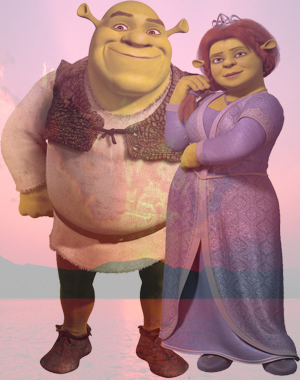

In [90]:
mix = Image.blend(shrek_RGB5, tlo, alpha = 0.3) 
mix


# Mieszanie obrazów. Przykład 2.

In [91]:
im_M = Image.open('dambele.jpg')
im_p = Image.open('zlota_pilka.png')

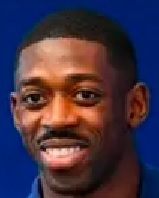

In [92]:
im_M

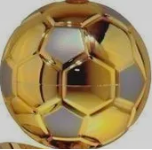

In [93]:
im_p

In [ ]:
im1 = im_M.copy()
im2 = im_p.copy()
w1, h1 = im1.size
w2, h2 = im2.size

print("Dambele", w1, h1)
print("puchar", w2, h2)
W = min(w1, w2)
H = min(h1, h2)
print(W, H) # dopasowanie rozmiarów obrazów do zastosowania blend

Dambele 159 198
puchar 152 150
152 150


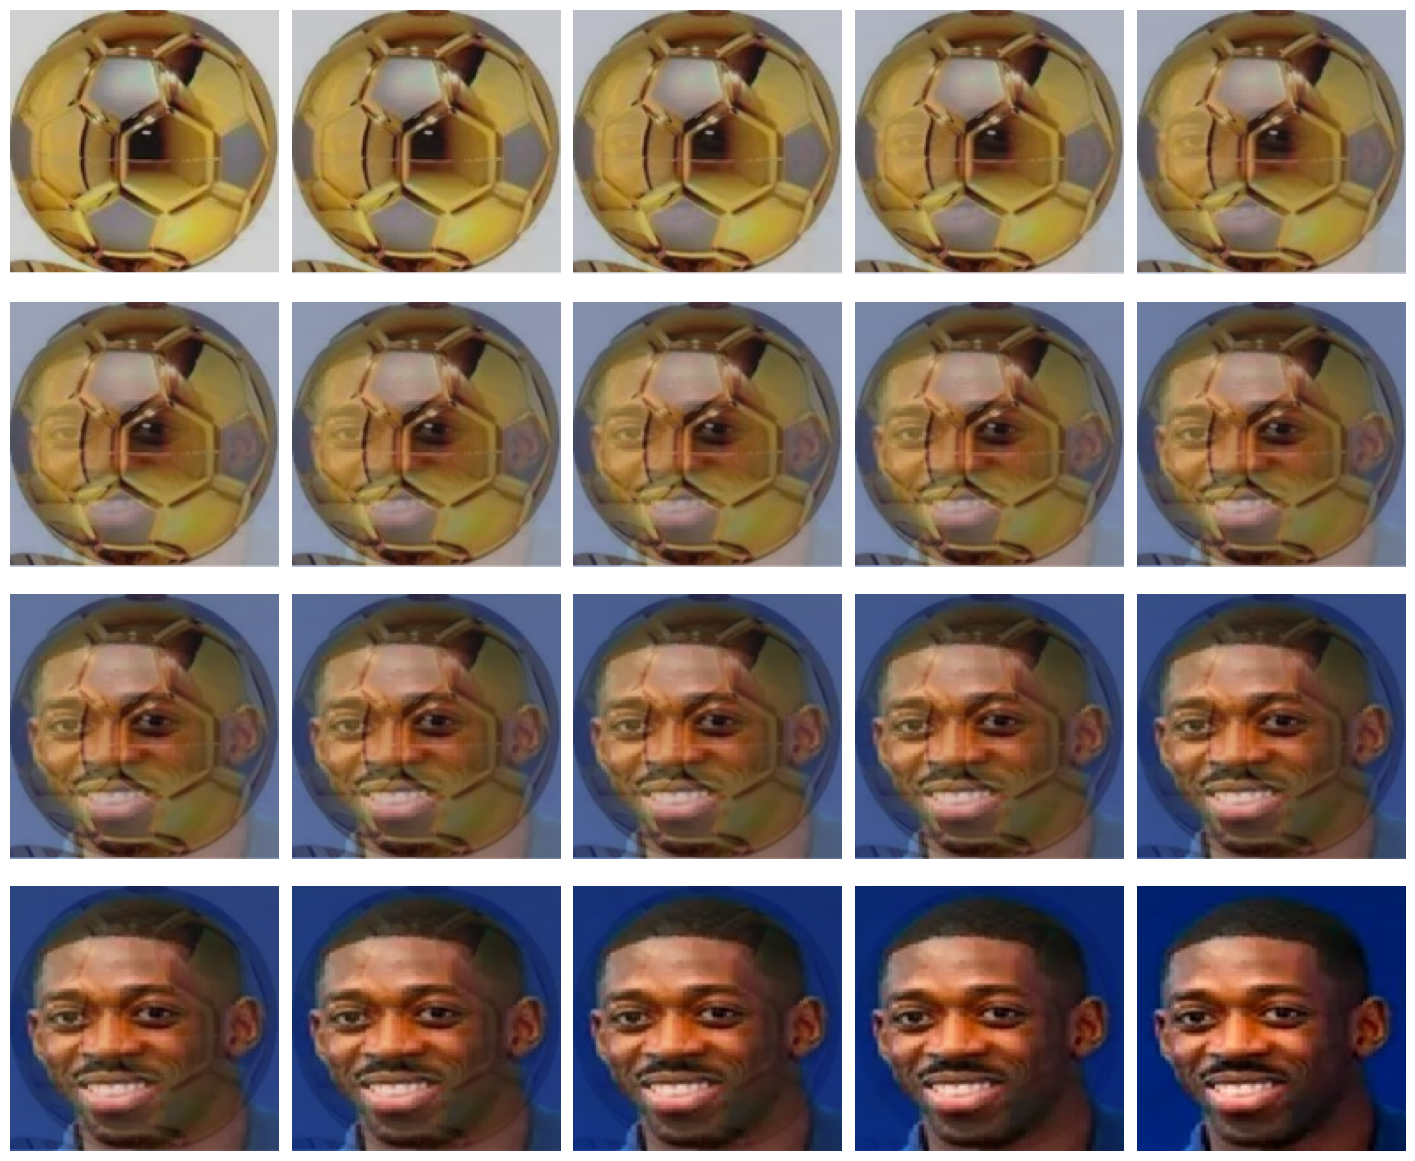

In [95]:
im_1 = im1.resize((W, H), 1)  
im_2 = im2.resize((W, H), 1)

i = 1
plt.figure(figsize=(18,15))
for alfa in np.linspace(0,1,20):
    plt.subplot(4,5,i)
    mix = Image.blend(im_2, im_1, alpha=alfa)
    plt.imshow(mix)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()